# Determine insert size from a library

In this exercise we will generate a histogram to determine the insert size of a library using the data we have previously extracted with SAMtools from a WGS.
First, we will import the required packages:

In [1]:
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will import the insert sized we have previously generated and we have saved as "insert_size.txt". We specify that we don't have a header.

In [2]:
set1 = pd.read_csv("insert_size.txt",sep='\t',header=None)

We convert the set to a pandas dataframe, and print it (only the first and last 30 rows are shown).

In [3]:
df = pd.DataFrame(set1)
df

,0
0,-462
1,-444
2,-466
3,-454
4,-462
5,-466
6,-441
7,-444
8,-449
9,-436


Describe the file:

In [4]:
df.describe()

,0
count,7.901480e+05
mean,5.677230e+04
std,3.071420e+06
min,-1.295440e+07
25%,-4.520000e+02
50%,0.000000e+00
75%,4.530000e+02
max,2.358825e+08


We can see in the description that we have both positive and negative numbers, and they go from -12 million bases to +23 million bases. We can plot it in a histogram: 

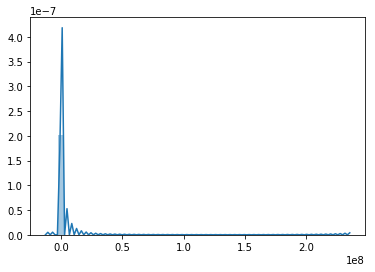

In [5]:
g = sns.distplot(df)

You can see that there is a big peak close to 0, and for large insert sizes there are not many reads. As we know that when we fragment the DNA in small pieces we will have fragment sizes around 500, we will select only those values between 0 and 1,000.

In [6]:
df2 = df[(df.iloc[:,0]>0) & (df.iloc[:,0]<1000)]
df2

,0
12,443
13,424
14,424
15,437
16,439
17,458
18,460
19,428
20,450
21,443


And now we will plot those values.

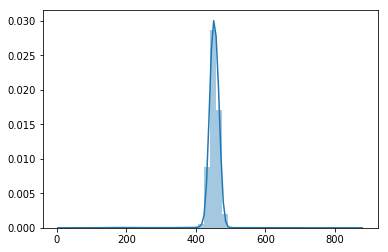

In [7]:
g = sns.distplot(df2)

You can see that there is a very narrow peak around 450. And we can get the summary for this subset:

In [8]:
df2.describe()

,0
count,387601.000000
mean,451.545373
std,22.517395
min,6.000000
25%,444.000000
50%,453.000000
75%,462.000000
max,876.000000


The insert size is indeed very narrow around 453 bp, with the 25% percentile in 444 and the 75% at 462.